## Predicting the Salary

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head(7)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000


In [4]:
df.tail(6)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [8]:
# Checking missing values

df.isnull().sum()   

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

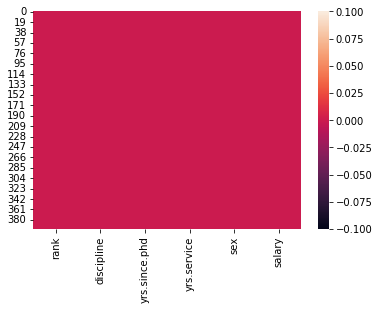

In [9]:
sns.heatmap(df.isnull())

In [10]:
dfcorr=df.corr()
dfcorr

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


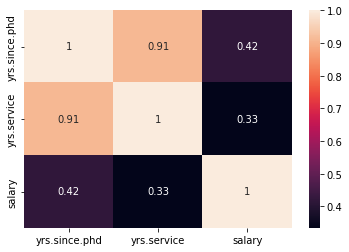

In [11]:
sns.heatmap(dfcorr,annot=True)

# Visualization of data

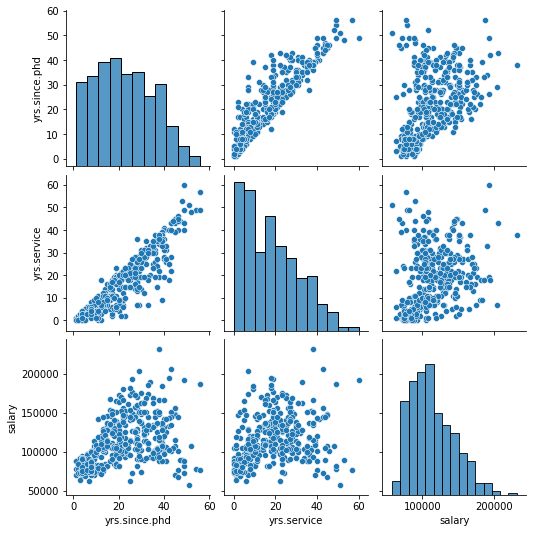

In [12]:
sns.pairplot(df)

yrs.since.phd       AxesSubplot(0.125,0.536818;0.352273x0.343182)
yrs.service      AxesSubplot(0.547727,0.536818;0.352273x0.343182)
salary                 AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

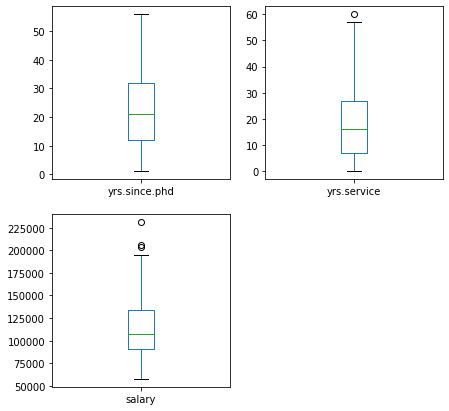

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F1551CE08>,
      dtype=object)

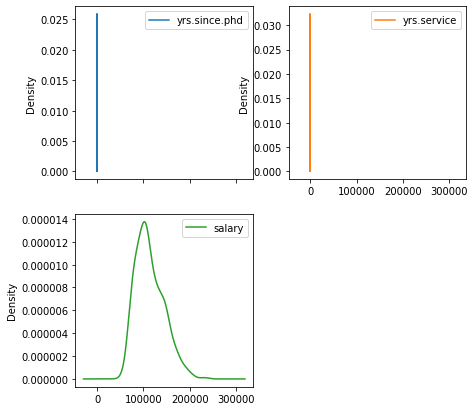

In [14]:
df.plot(kind='kde', subplots=True, layout=(2,2), figsize=(7,7))

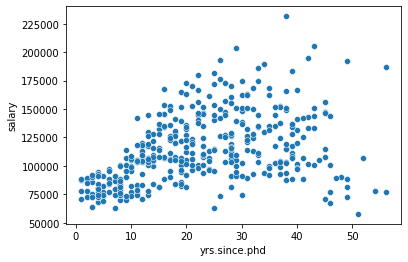

In [15]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

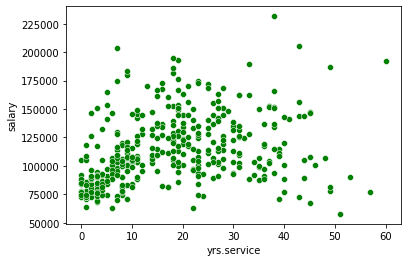

In [16]:
sns.scatterplot(x="yrs.service",y="salary",data=df, color="Green")

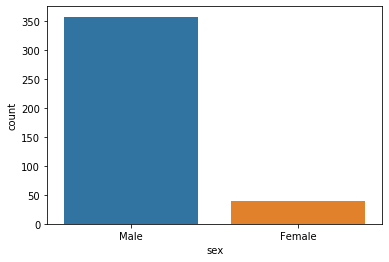

In [17]:
sns.countplot(df['sex'])

### Removing Outlier

In [18]:
from scipy.stats import zscore

In [19]:
df_new=df.drop(columns=['rank','discipline','sex'])
df_new

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [20]:
zscore(df_new)

array([[-0.25754973,  0.02966908,  0.86091884],
       [-0.17985426, -0.12429986,  1.96667226],
       [-1.42298184, -1.12509795, -1.12249537],
       ...,
       [ 1.52944617,  0.56856036, -0.39564018],
       [ 0.20862311, -0.20128433, -0.60750187],
       [-1.11219995, -1.04811348, -1.08001725]])

In [21]:
z=np.abs(zscore(df_new))
z

array([[0.25754973, 0.02966908, 0.86091884],
       [0.17985426, 0.12429986, 1.96667226],
       [1.42298184, 1.12509795, 1.12249537],
       ...,
       [1.52944617, 0.56856036, 0.39564018],
       [0.20862311, 0.20128433, 0.60750187],
       [1.11219995, 1.04811348, 1.08001725]])

In [22]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [23]:
z[43][1]

1.569358449995484

In [24]:
z[131][2]

1.218690960094809

In [25]:
len(np.where(z>3)[0])

4

 4 Outliers are present in data, let's remove the outliers

In [26]:
df_new.drop([ 43, 131, 330, 364],axis=0)

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [27]:
dfs=df_new[(z<3).all(axis=1)]
dfs

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [28]:
x=dfs.drop(columns=['salary'])
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [29]:
y=dfs['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [30]:

from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()
scaled=sc.fit_transform(x)
print(scaled)

[[-0.24194678  0.05627813]
 [-0.16310343 -0.10226886]
 [-1.42459711 -1.13282426]
 [ 1.80798045  1.72102147]
 [ 1.41376367  1.87956846]
 [-1.2669104  -0.89500378]
 [ 0.62533012  0.45264559]
 [ 1.80798045  2.19666243]
 [-0.08426007  0.21482511]
 [-0.32079014  0.05627813]
 [-0.79385027 -0.7364568 ]
 [-1.18806704 -1.21209775]
 [-1.66112717 -1.29137124]
 [-1.58228382 -1.37064474]
 [-0.16310343  0.05627813]
 [-0.79385027 -1.13282426]
 [-0.24194678  0.21482511]
 [ 1.25607696  1.32465401]
 [ 1.17723361  0.45264559]
 [ 1.33492032  1.48320099]
 [ 0.70417348  0.69046607]
 [ 1.09839025  1.08683353]
 [ 0.94070354  1.00756004]
 [ 0.15226999  0.13555162]
 [-0.71500691 -0.7364568 ]
 [-0.08426007 -0.7364568 ]
 [ 1.0195469   0.45264559]
 [-1.34575375 -1.13282426]
 [-0.87269362 -1.37064474]
 [-0.79385027 -0.7364568 ]
 [-0.16310343 -1.05355077]
 [-1.18806704 -1.21209775]
 [-0.71500691 -0.6571833 ]
 [-1.42459711 -1.21209775]
 [-1.42459711 -1.21209775]
 [-1.34575375 -1.37064474]
 [-0.00541672  0.29409861]
 

In [32]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.33,random_state=42)

In [33]:
train_x.shape

(263, 2)

In [34]:
test_x.shape

(130, 2)

In [35]:
train_y.shape

(263,)

In [36]:
y=test_y.shape
y

(130,)

In [38]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [39]:
lr.coef_

array([1536.01512823, -586.89630754])

In [40]:
lr.intercept_

90020.65725137769

In [41]:
lr.score(train_x,train_y)

0.19598842579512699

In [42]:
pred=lr.predict(test_x)
pred

array([ 98062.95540569, 121790.92592298, 130456.82181733, 113024.18274237,
       123102.26725682, 121103.18232917, 135615.06207707, 123051.84361369,
       116994.90817639, 128796.98018097, 107104.79602383,  94404.02884168,
       131057.44033551, 106517.89971629,  97476.05909815, 141722.42115751,
       144207.55510643,  99961.19304707, 122740.04474367, 130282.57166607,
       106692.14986754, 126486.09638331, 115059.96910251, 108640.81115206,
       112749.08530484, 108452.83879016,  94041.80632853,  94990.92514923,
       111662.41776539, 118806.02074214,  91556.67237961, 120841.80710229,
       144643.18048457, 129383.87648852, 101272.53438092, 133629.69936006,
       111712.84140852, 100098.74176583, 119530.46576845, 117581.80448393,
       123826.71228313, 115646.86541005, 120342.03587038,  92868.01371345,
       103670.54325421, 110539.04879344, 114197.97535745, 118081.57571584,
       133267.47684691,  93817.13253414,  98562.7266376 ,  99149.62294514,
       118393.37458586, 1

In [46]:
print(" Predicted Salary:\n",pred,"\n\n", "Actual Salary:\n",test_y)

 Predicted Salary:
 [ 98062.95540569 121790.92592298 130456.82181733 113024.18274237
 123102.26725682 121103.18232917 135615.06207707 123051.84361369
 116994.90817639 128796.98018097 107104.79602383  94404.02884168
 131057.44033551 106517.89971629  97476.05909815 141722.42115751
 144207.55510643  99961.19304707 122740.04474367 130282.57166607
 106692.14986754 126486.09638331 115059.96910251 108640.81115206
 112749.08530484 108452.83879016  94041.80632853  94990.92514923
 111662.41776539 118806.02074214  91556.67237961 120841.80710229
 144643.18048457 129383.87648852 101272.53438092 133629.69936006
 111712.84140852 100098.74176583 119530.46576845 117581.80448393
 123826.71228313 115646.86541005 120342.03587038  92868.01371345
 103670.54325421 110539.04879344 114197.97535745 118081.57571584
 133267.47684691  93817.13253414  98562.7266376   99149.62294514
 118393.37458586 102221.65320161 127260.96505274 129108.77905099
 117581.80448393 117856.90192145 124638.28238506  99598.97053392
  961